####Question 1
#####Use following sentences to find the tf*idf vectorized data.
#####1.The postman delivered the package to the wrong address.
#####2.I wrapped a beautiful present for my friend's birthday.
#####3.The delivery truck arrived late due to heavy traffic.
#####4.We need to check the shipping address before sending the order.
#####5.Online shopping offers a wide variety of products with fast delivery.

In [14]:
#import the class
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [15]:
#create the object
tfidf = TfidfVectorizer()


In [16]:
sentence_1 = "The postman delivered the package to the wrong address."
sentence_2 = "I wrapped a beautiful present for my friend's birthday."
sentence_3 = "The delivery truck arrived late due to heavy traffic."
sentence_4 = "We need to check the shipping address before sending the order."
sentence_5 = "Online shopping offers a wide variety of products with fast delivery."

In [17]:
# apply the algorithm
new_data = tfidf.fit_transform([sentence_1, sentence_2, sentence_3, sentence_4, sentence_5])


In [18]:
new_data.toarray()


array([[0.26692128, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.33084204, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.33084204, 0.33084204, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.66470631, 0.22156877, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.33084204],
       [0.        , 0.        , 0.37796447, 0.        , 0.37796447,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.37796447, 0.37796447, 0.        , 0.        , 0.37796447,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.37796447, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.37796

In [19]:
tfidf.get_feature_names_out()


array(['address', 'arrived', 'beautiful', 'before', 'birthday', 'check',
       'delivered', 'delivery', 'due', 'fast', 'for', 'friend', 'heavy',
       'late', 'my', 'need', 'of', 'offers', 'online', 'order', 'package',
       'postman', 'present', 'products', 'sending', 'shipping',
       'shopping', 'the', 'to', 'traffic', 'truck', 'variety', 'we',
       'wide', 'with', 'wrapped', 'wrong'], dtype=object)

In [20]:
df = pd.DataFrame(data=new_data.toarray(),
                  columns=tfidf.get_feature_names_out())
df

,address,arrived,beautiful,before,birthday,check,delivered,delivery,due,fast,...,the,to,traffic,truck,variety,we,wide,with,wrapped,wrong
0,0.266921,0.000000,0.000000,0.000000,0.000000,0.000000,0.330842,0.000000,0.000000,0.000000,...,0.664706,0.221569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.330842
1,0.000000,0.000000,0.377964,0.000000,0.377964,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377964,0.000000
2,0.000000,0.363987,0.000000,0.000000,0.000000,0.000000,0.000000,0.293662,0.363987,0.000000,...,0.243766,0.243766,0.363987,0.363987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.256500,0.000000,0.000000,0.317925,0.000000,0.317925,0.000000,0.000000,0.000000,0.000000,...,0.425837,0.212918,0.000000,0.000000,0.000000,0.317925,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.259704,0.000000,0.321896,...,0.000000,0.000000,0.000000,0.000000,0.321896,0.000000,0.321896,0.321896,0.000000,0.000000


####Question 2

In [38]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

Read the dataset

In [22]:
df = pd.read_csv('spam_messages.csv')


In [23]:
df.columns

Index(['Category', 'Message'], dtype='object')

Seperate the input and output data

In [24]:
features = df['Message']  # input data
Category = df['Category']    # output data

In [25]:
features.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

Explore the output data

In [26]:
Category

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object

In [27]:
set(Category)

{'ham', 'spam'}

<Axes: xlabel='Category', ylabel='count'>

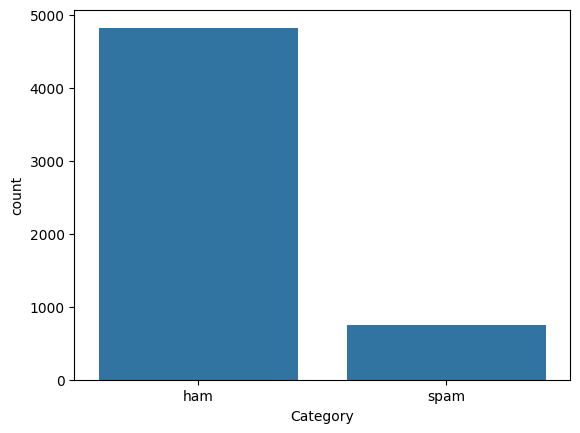

In [28]:
sns.countplot(x = Category)

In [29]:
Category.value_counts()


Category
ham     4825
spam     747
Name: count, dtype: int64

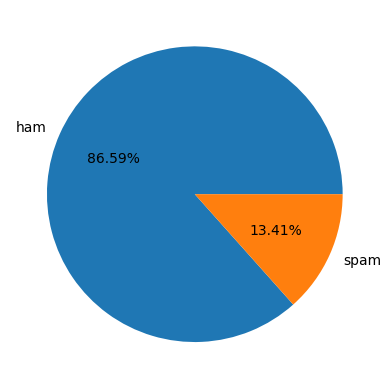

In [30]:
plt.pie(Category.value_counts(), labels = Category.value_counts().index, autopct='%2.2f%%');


Prepare and vectorize the data

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
swords = stopwords.words('english')

In [44]:
ps = PorterStemmer()

In [45]:
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [x.lower() for x in tokens1 if x.isalpha()]
    tokens3 = [x for x in tokens2 if x not in swords]
    tokens4 = [ps.stem(x) for x in tokens3]
    return tokens4

In [50]:
sent = 'It was the expected result. Like it'

In [51]:
clean_text(sent)

['expect', 'result', 'like']

In [52]:
clean_text(features[123])

['today',
 'voda',
 'number',
 'end',
 'select',
 'receiv',
 'award',
 'match',
 'pleas',
 'call',
 'quot',
 'claim',
 'code',
 'standard',
 'rate',
 'app']

In [54]:
tfidf = TfidfVectorizer(analyzer=clean_text)


In [55]:
# perform the operation
features_new = tfidf.fit_transform(features)

In [56]:
features_new.shape


(5572, 5926)

In [57]:
len(tfidf.get_feature_names_out())


5926

Perform Cross Validation

In [58]:
#importing the function
from sklearn.model_selection import train_test_split


In [60]:
#performing cross validation
x_train, x_test, y_train, y_test = train_test_split(features_new, Category, random_state=0)


In [61]:
x_train.shape


(4179, 5926)

In [62]:
x_test.shape


(1393, 5926)

In [63]:
y_train.shape


(4179,)

In [98]:
y_test.shape


(1393,)

In [79]:
x_train[16]


<1x5926 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [80]:
y_train[16]

'ham'

Build the decision tree model for classification

In [65]:
#importing the class
from sklearn.tree import DecisionTreeClassifier


In [81]:
from sklearn.tree import plot_tree


In [66]:
# create the object
dt = DecisionTreeClassifier(random_state=0)

In [84]:
# train the algorithm
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

[Text(0.7001953125, 0.9545454545454546, 'x[756] <= 0.102\ngini = 0.233\nsamples = 4179\nvalue = [3617, 562]'),
 Text(0.525390625, 0.8636363636363636, 'x[5373] <= 0.061\ngini = 0.159\nsamples = 3760\nvalue = [3432, 328]'),
 Text(0.39453125, 0.7727272727272727, 'x[4217] <= 0.103\ngini = 0.116\nsamples = 3648\nvalue = [3422, 226]'),
 Text(0.2734375, 0.6818181818181818, 'x[5118] <= 0.121\ngini = 0.097\nsamples = 3576\nvalue = [3393, 183]'),
 Text(0.171875, 0.5909090909090909, 'x[2395] <= 0.102\ngini = 0.076\nsamples = 3475\nvalue = [3338, 137]'),
 Text(0.15625, 0.5, 'x[936] <= 0.075\ngini = 0.069\nsamples = 3461\nvalue = [3338, 123]'),
 Text(0.140625, 0.4090909090909091, 'x[5259] <= 0.081\ngini = 0.064\nsamples = 3452\nvalue = [3338, 114]'),
 Text(0.125, 0.3181818181818182, 'x[1920] <= 0.096\ngini = 0.06\nsamples = 3444\nvalue = [3338, 106]'),
 Text(0.0625, 0.22727272727272727, 'x[1174] <= 0.247\ngini = 0.05\nsamples = 3400\nvalue = [3312, 88]'),
 Text(0.03125, 0.13636363636363635, 'x[4127

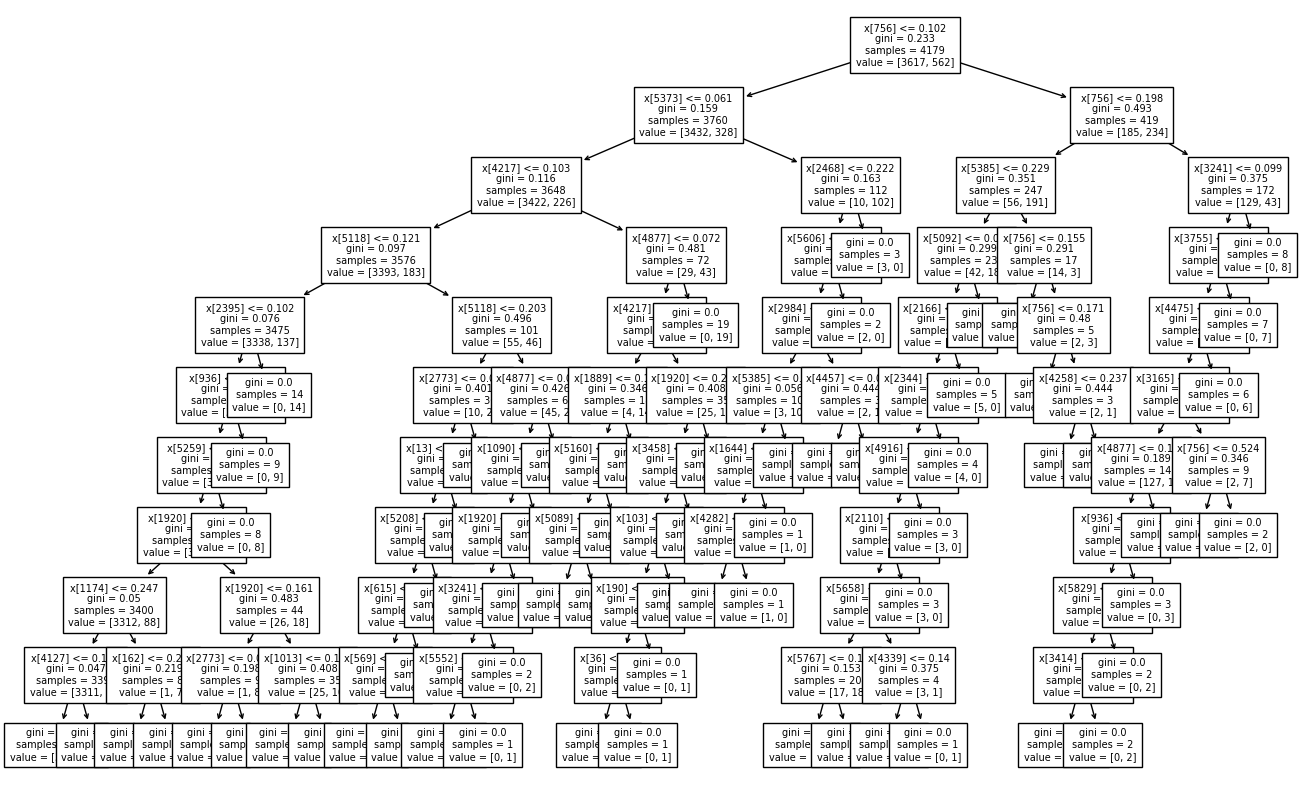

In [92]:
plt.figure(figsize=(16,10))
plot_tree(dt, fontsize=7)


In [94]:
tfidf.get_feature_names_out()[5118]


'text'

Evaluate the performance of algorithm

In [96]:
# predicting the result on test data
y_pred = dt.predict(x_test)
y_pred

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [97]:
len(y_pred)


1393

In [99]:
y_test


4456     ham
690     spam
944      ham
3768     ham
1189     ham
        ... 
1889     ham
2250    spam
2915    spam
1282     ham
1206     ham
Name: Category, Length: 1393, dtype: object

In [100]:
#implying confusion matrix to check the performance
# import the class
from sklearn.metrics import ConfusionMatrixDisplay

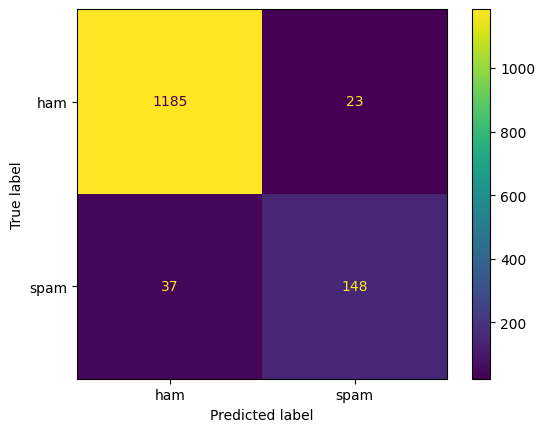

In [101]:
# show the matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

Predict the category of mails from sample.csv

In [105]:
f = open('sample.csv', encoding = 'utf-8')
mails = f.readlines()

In [106]:
mails

['Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.,,\n',
 'As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a £1500 Bonus Prize, call 09066364589\n',
 '"Today is ""song dedicated day.."" Which song will u dedicate for me? Send this to all ur valuable frnds but first rply me...",,\n']

In [107]:
tfidf.transform(mails)

<3x5926 sparse matrix of type '<class 'numpy.float64'>'
	with 38 stored elements in Compressed Sparse Row format>

In [108]:
dt.predict(tfidf.transform(mails))


array(['ham', 'spam', 'ham'], dtype=object)

In [109]:
len(mails)


3